# LAHMC Paper results

In [1]:
using MCMCChains
using DataFrames

include("lahmc.jl")
include("run_lahmc.jl")

sample_loop (generic function with 1 method)

# Rough Well

In [2]:
n_samples = 1000
n_chains = 100
epsilon = 1
L = 10
K = 4
beta = 0.1
n_param = 2

rw = Rough_Well(2, 100, 4)

function U(X)
    return U_rough_well(X, rw)
end

function dU(X)
    return dU_rough_well(X, rw)
end
function init_q()
    return init_rough_well(rw)
end

init_q (generic function with 1 method)

In [3]:
lahmc_samples = sample_loop(n_chains, U, dU, init_q, epsilon, L, 10, beta, n_param, n_samples)

Dict{Any, Any} with 3 entries:
  :samples    => [27.0313 95.8153 … -63.4146 -81.6996; 20.0093 -48.2409 … -10.8…
  :trans      => Dict("L1"=>0.552763, "L4"=>0.0189289, "L8"=>0.00336336, "avg_a…
  :grad_evals => 3751600

In [4]:
hmc_samples = sample_loop(n_chains, U, dU, init_q, epsilon, L, 1, beta, n_param, n_samples)

Dict{Any, Any} with 3 entries:
  :samples    => [102.444 -82.9637 … 74.0019 83.244; 147.911 51.9291 … -65.0759…
  :trans      => Dict("L1"=>0.54998, "avg_accept"=>0.54998, "F"=>0.45002)
  :grad_evals => 999000

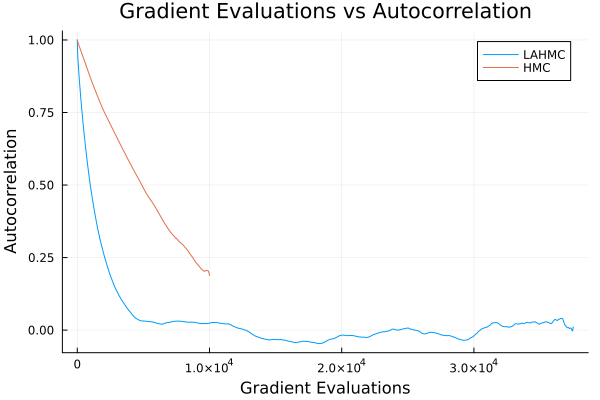

In [5]:
autocorrelation_lahmc = autocorrelation(lahmc_samples[:samples])
autocorrelation_hmc = autocorrelation(hmc_samples[:samples])

gradient_evaluations_lahmc = LinRange(0, lahmc_samples[:grad_evals]/n_chains, length(autocorrelation_lahmc))
gradient_evaluations_hmc = LinRange(0, hmc_samples[:grad_evals]/n_chains, length(autocorrelation_hmc))

plt_lahmc_ac = plot(gradient_evaluations_lahmc, autocorrelation_lahmc, title="Gradient Evaluations vs Autocorrelation", xlabel="Gradient Evaluations", ylabel="Autocorrelation", label="LAHMC")
plt_hmc_ac = plot!(gradient_evaluations_hmc, autocorrelation_hmc, label="HMC")

display(plt_lahmc_ac)

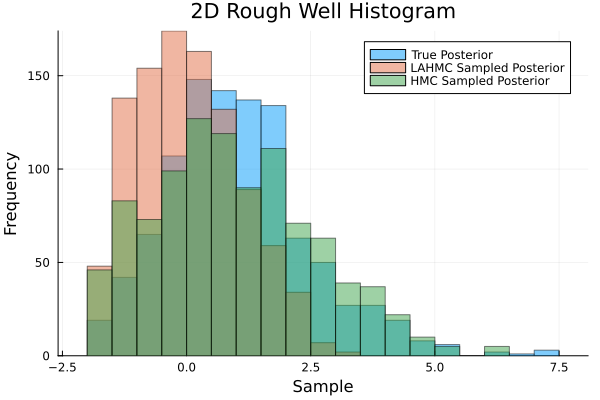

In [6]:
plot_histograms(U, init_q, lahmc_samples[:samples], n_samples, "2D Rough Well Histogram"; hmc_samples=hmc_samples[:samples])

In [7]:
lahmc_trans_df = DataFrame(lahmc_samples[:trans])

Row,F,L1,L10,L2,L3,L4,L5,L6,L7,L8,L9,avg_accept
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.261752,0.552763,0.00182182,0.0995796,0.0354054,0.0189289,0.0115916,0.00760761,0.00471471,0.00336336,0.00247247,0.738248


In [8]:
hmc_trans_df = DataFrame(hmc_samples[:trans])

Row,F,L1,avg_accept
,Float64,Float64,Float64
1,0.45002,0.54998,0.54998


In [9]:
lahmc_chain = Chains(permutedims(lahmc_samples[:samples], (3,1,2)), [:v, :x])
df_lahmc_summary = DataFrame(MCMCChains.summarize(lahmc_chain))
df_lahmc_summary

Row,parameters,mean,std,mcse,ess_bulk,ess_tail,rhat,ess_per_sec
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,v,-0.908353,99.4875,2.9475,1141.8,1808.07,1.08622,missing
2,x,-2.67966,100.901,2.97264,1159.42,1438.06,1.07949,missing


In [10]:
hmc_chain = Chains(permutedims(hmc_samples[:samples], (3,1,2)), [:v, :x])
df_hmc_summary = DataFrame(MCMCChains.summarize(hmc_chain))
df_hmc_summary

Row,parameters,mean,std,mcse,ess_bulk,ess_tail,rhat,ess_per_sec
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,v,15.4177,96.0456,6.15254,244.85,309.945,2.14823,missing
2,x,3.98287,101.338,6.5421,240.893,339.5,2.20808,missing


# 2D ill-conditioned Gaussian

In [11]:
# n_samples = 10000
# n_chains = 50
epsilon = 1
L = 10
K = 4
beta = 0.1
n_param = 2

gauss_2d = Gaussian(2, 6)

function U(X)
    return U_gaussian(X, gauss_2d)
end

function dU(X)
    return dU_gaussian(X, gauss_2d)
end
function init_q()
    return init_gaussian(gauss_2d)
end

init_q (generic function with 1 method)

In [12]:
lahmc_samples = sample_loop(n_chains, U, dU, init_q, epsilon, L, K, beta, n_param, n_samples)

Dict{Any, Any} with 3 entries:
  :samples    => [745.546 -1157.96 … -807.296 574.959; 0.138728 -0.155422 … -0.…
  :trans      => Dict("L1"=>0.921441, "L2"=>0.0352553, "L3"=>0.0433033, "L4"=>0…
  :grad_evals => 1120740

In [13]:
hmc_samples = sample_loop(n_chains, U, dU, init_q, epsilon, L, 1, beta, n_param, n_samples)

Dict{Any, Any} with 3 entries:
  :samples    => [1310.44 548.817 … 77.5745 117.376; 0.13177 0.416625 … 1.081 0…
  :trans      => Dict("L1"=>0.921642, "avg_accept"=>0.921642, "F"=>0.0783584)
  :grad_evals => 999000

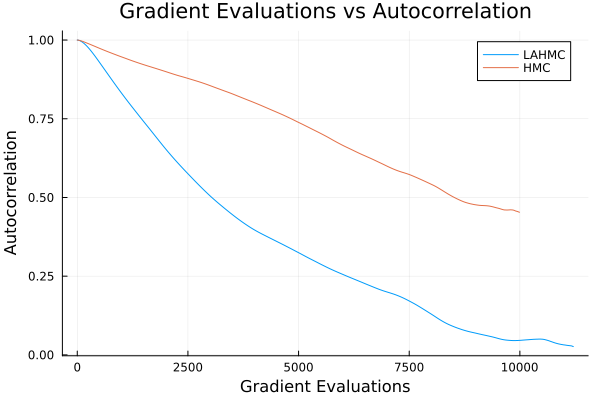

In [14]:
autocorrelation_lahmc = autocorrelation(lahmc_samples[:samples])
autocorrelation_hmc = autocorrelation(hmc_samples[:samples])

gradient_evaluations_lahmc = LinRange(0, lahmc_samples[:grad_evals]/n_chains, length(autocorrelation_lahmc))
gradient_evaluations_hmc = LinRange(0, hmc_samples[:grad_evals]/n_chains, length(autocorrelation_hmc))

plt_lahmc_ac = plot(gradient_evaluations_lahmc, autocorrelation_lahmc, title="Gradient Evaluations vs Autocorrelation", xlabel="Gradient Evaluations", ylabel="Autocorrelation", label="LAHMC")
plt_hmc_ac = plot!(gradient_evaluations_hmc, autocorrelation_hmc, label="HMC")

display(plt_lahmc_ac)

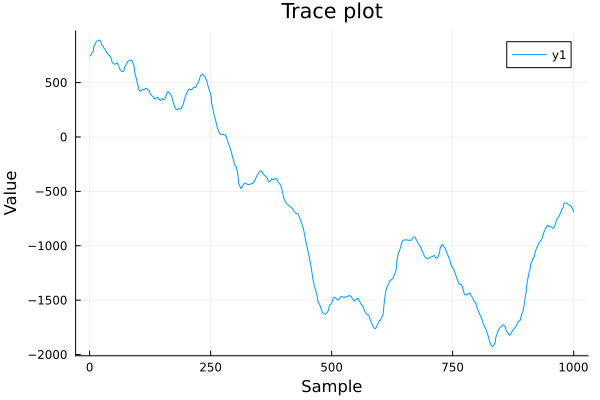

In [15]:
plot(lahmc_samples[:samples][1, 1, :], title="Trace plot", xlabel="Sample", ylabel="Value")

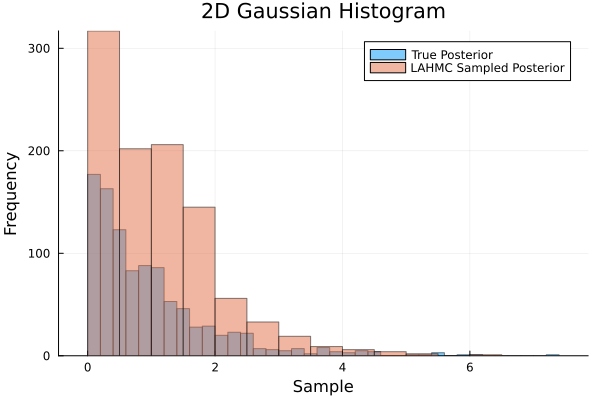

In [16]:
plot_histograms(U, init_q, lahmc_samples[:samples], n_samples, "2D Gaussian Histogram")

In [17]:
lahmc_trans_df = DataFrame(lahmc_samples[:trans])

Row,F,L1,L2,L3,L4,avg_accept
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.921441,0.0352553,0.0433033,0.0,1.0


In [18]:
hmc_trans_df = DataFrame(hmc_samples[:trans])

Row,F,L1,avg_accept
,Float64,Float64,Float64
1,0.0783584,0.921642,0.921642


In [19]:
lahmc_chain = Chains(permutedims(lahmc_samples[:samples], (3,1,2)), [:y1, :y2])
df_lahmc_summary = DataFrame(MCMCChains.summarize(lahmc_chain))
df_lahmc_summary

Row,parameters,mean,std,mcse,ess_bulk,ess_tail,rhat,ess_per_sec
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,y1,-133.414,974.234,59.0738,272.161,440.53,1.75672,missing
2,y2,0.0022356,0.990373,0.00265927,1.39105e5,27643.0,1.0086,missing


In [20]:
hmc_chain = Chains(permutedims(hmc_samples[:samples], (3,1,2)), [:y1, :y2])
df_hmc_summary = DataFrame(MCMCChains.summarize(hmc_chain))
df_hmc_summary

Row,parameters,mean,std,mcse,ess_bulk,ess_tail,rhat,ess_per_sec
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,y1,7.95472,951.497,64.4785,219.402,296.281,3.03029,missing
2,y2,0.000322121,0.994682,0.00299112,1.10286e5,30445.2,1.00763,missing


# 100D ill-conditioned Gaussian

In [21]:
# n_samples = 1000
# n_chains = 50
epsilon = 1
L = 10
K = 4
beta = 0.1
n_param = 100

gauss_2d = Gaussian(100, 6)

function U(X)
    return U_gaussian(X, gauss_2d)
end

function dU(X)
    return dU_gaussian(X, gauss_2d)
end
function init_q()
    return init_gaussian(gauss_2d)
end

init_q (generic function with 1 method)

In [22]:
lahmc_samples = sample_loop(n_chains, U, dU, init_q, epsilon, L, K, beta, n_param, n_samples)

Dict{Any, Any} with 3 entries:
  :samples    => [-694.329 -603.737 … -506.42 86.0047; 352.32 -338.982 … -416.9…
  :trans      => Dict("L1"=>0.850591, "L2"=>0.0602503, "L3"=>0.0351552, "L4"=>0…
  :grad_evals => 1291280

In [23]:
hmc_samples = sample_loop(n_chains, U, dU, init_q, epsilon, L, 1, beta, n_param, n_samples)

Dict{Any, Any} with 3 entries:
  :samples    => [-1147.38 -450.421 … -160.003 -2062.28; -107.018 164.584 … -30…
  :trans      => Dict("L1"=>0.85043, "avg_accept"=>0.85043, "F"=>0.14957)
  :grad_evals => 999000

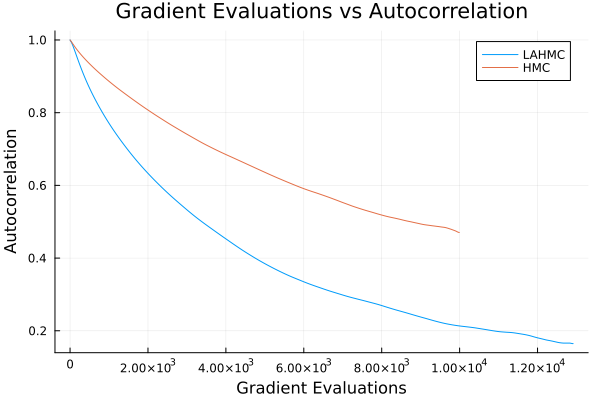

In [24]:
autocorrelation_lahmc = autocorrelation(lahmc_samples[:samples])
autocorrelation_hmc = autocorrelation(hmc_samples[:samples])

gradient_evaluations_lahmc = LinRange(0, lahmc_samples[:grad_evals]/n_chains, length(autocorrelation_lahmc))
gradient_evaluations_hmc = LinRange(0, hmc_samples[:grad_evals]/n_chains, length(autocorrelation_hmc))

plt_lahmc_ac = plot(gradient_evaluations_lahmc, autocorrelation_lahmc, title="Gradient Evaluations vs Autocorrelation", xlabel="Gradient Evaluations", ylabel="Autocorrelation", label="LAHMC")
plt_hmc_ac = plot!(gradient_evaluations_hmc, autocorrelation_hmc, label="HMC")

display(plt_lahmc_ac)

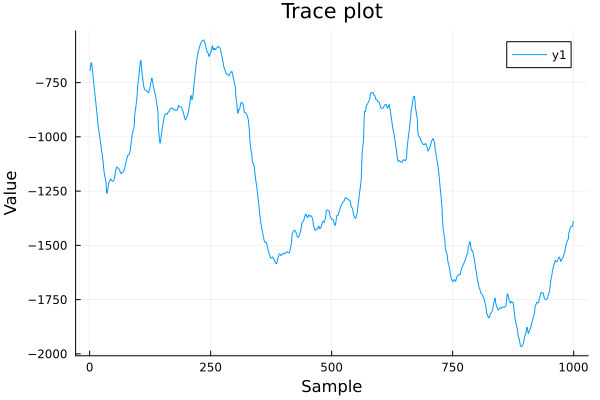

In [25]:
plot(lahmc_samples[:samples][1, 1, :], title="Trace plot", xlabel="Sample", ylabel="Value")

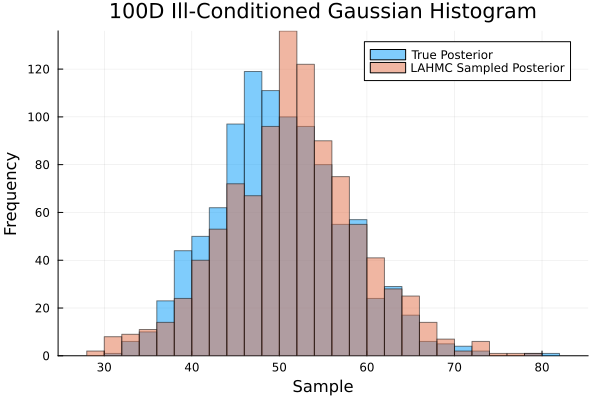

In [26]:
plot_histograms(U, init_q, lahmc_samples[:samples], n_samples, "100D Ill-Conditioned Gaussian Histogram")

In [27]:
lahmc_trans_df = DataFrame(lahmc_samples[:trans])

Row,F,L1,L2,L3,L4,avg_accept
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0477678,0.850591,0.0602503,0.0351552,0.00623624,0.952232


In [28]:
hmc_trans_df = DataFrame(hmc_samples[:trans])

Row,F,L1,avg_accept
,Float64,Float64,Float64
1,0.14957,0.85043,0.85043


In [29]:
lahmc_chain = Chains(permutedims(lahmc_samples[:samples], (3,1,2)))
df_lahmc_summary = DataFrame(MCMCChains.summarize(lahmc_chain))
df_lahmc_summary

Row,parameters,mean,std,mcse,ess_bulk,ess_tail,rhat,ess_per_sec
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,param_1,-133.012,917.215,60.1779,233.998,342.264,2.38011,missing
2,param_2,-26.5921,762.808,49.3324,239.727,400.101,2.2755,missing
3,param_3,56.4556,910.823,59.7916,232.15,309.5,2.43154,missing
4,param_4,-89.4592,831.995,53.6775,241.648,354.571,2.17947,missing
5,param_5,-2.49205,728.148,45.8787,254.025,375.612,1.97978,missing
6,param_6,9.12927,665.05,40.7681,267.877,357.766,1.81439,missing
7,param_7,-37.8287,641.194,39.2362,270.771,379.236,1.82354,missing
8,param_8,24.0716,616.637,37.3321,274.0,464.766,1.75856,missing
9,param_9,25.5829,593.287,35.8238,274.78,411.348,1.75885,missing


In [30]:
hmc_chain = Chains(permutedims(hmc_samples[:samples], (3,1,2)))
df_hmc_summary = DataFrame(MCMCChains.summarize(hmc_chain))
df_hmc_summary

Row,parameters,mean,std,mcse,ess_bulk,ess_tail,rhat,ess_per_sec
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,param_1,129.82,1052.79,72.9689,208.784,246.888,4.35947,missing
2,param_2,-136.897,885.044,61.2257,210.207,238.359,4.16559,missing
3,param_3,14.5054,846.475,58.255,212.397,253.532,3.75963,missing
4,param_4,-45.5809,832.26,57.1972,212.644,286.196,3.74017,missing
5,param_5,-84.4779,715.453,48.7042,216.691,267.343,3.27394,missing
6,param_6,-21.7632,698.78,47.4931,218.105,286.824,3.14056,missing
7,param_7,16.4593,687.456,46.5425,219.044,269.09,3.07231,missing
8,param_8,-36.97,573.671,38.2158,225.943,287.28,2.67295,missing
9,param_9,-12.7802,596.822,40.0506,222.4,288.786,2.84158,missing
